# Plotting radial Coulomb wave functions

## Description
Radial part of Coulomb wave functions has been computed by c++ code. Energy values were substituded from analytical solution. Points taken from c++ output were used here to compare them with analytical solutions.

In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import scipy as sp
from scipy import special, integrate
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)

In [66]:
mu = 1.4830/2
alphaS = 0.5461
maxN = 5 # n = n'+l+1; E = -R/n**2

In [67]:
def plot(ax, n, l, cutoff=-1):
    data = pd.read_csv("points_{0}-{1}.dat".format(n, l), delimiter="|", index_col=0).iloc[0:cutoff]
    norm = sp.integrate.trapz(data['u']**2, x=data.index)**(1/2)
    prefactor = (2*4/3*mu*alphaS/n)**(3/2)*(sp.special.factorial(n-l-1)/2/n/sp.special.factorial(n+l))**(1/2)
    ax.plot(data.index, (data['u']/norm), linestyle="", marker=".")
    ax.plot(data.index.values, prefactor*data.index.values*sp.special.assoc_laguerre(data.index.values*2*4/3*alphaS*mu/n, n-l-1, 2*l+1)*(2*mu*4/3*alphaS/n*data.index.values)**l*sp.exp(-data.index.values*4/3*mu*alphaS/n))
    return ax

Wave function's tail become longer as $n$ grows. ODE integrator fails to keep zero value infinitely long and blows up at some point. That is why cutoff needed. For now only empirically fitted cutoff function has been used.

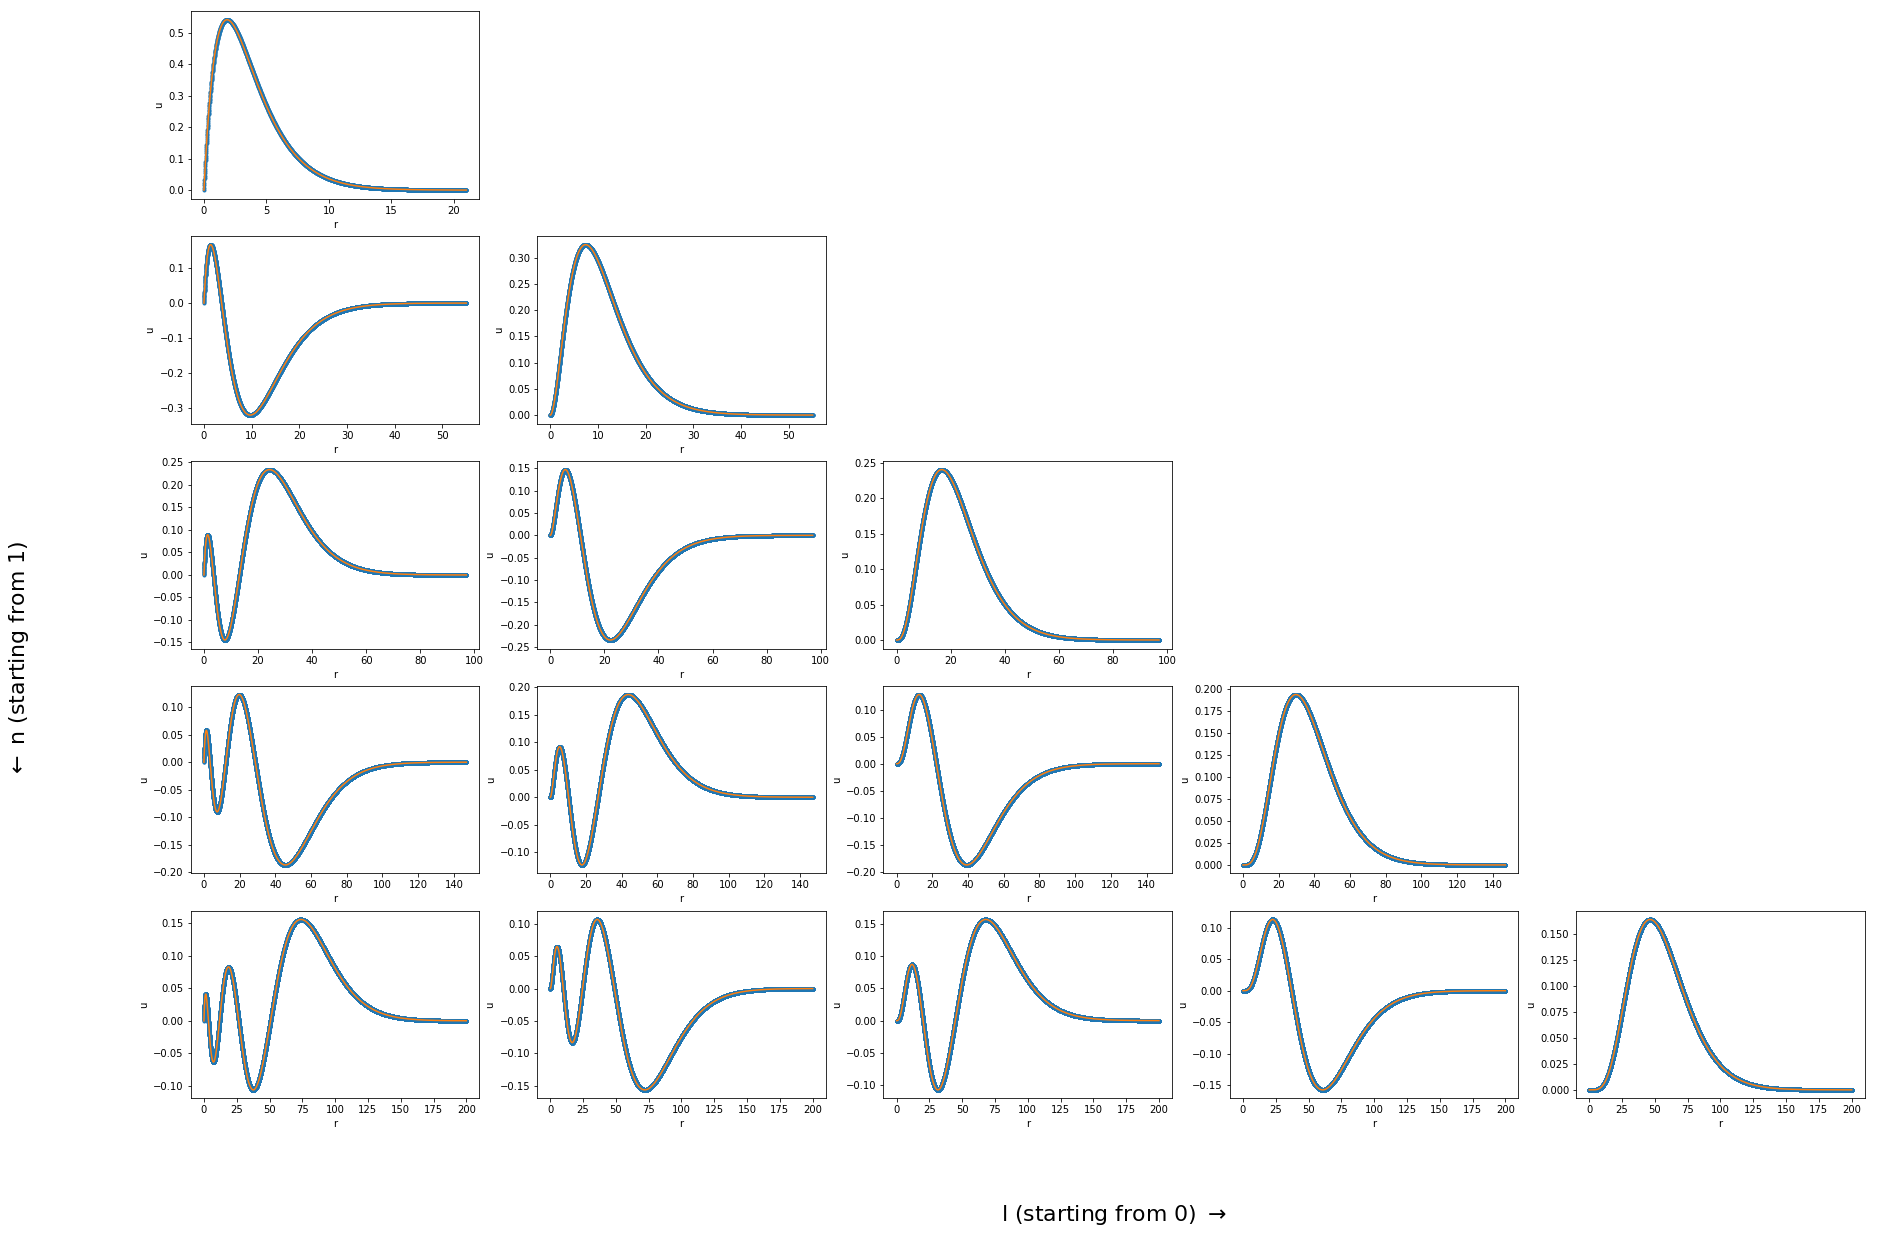

In [118]:
fig, ax = plt.subplots(maxN, maxN, figsize=(30,20))
fig.text(0.04, 0.5, "$\\leftarrow$ n (starting from 1)", rotation="vertical", fontdict={'size': 22})
fig.text(0.5, 0.04, "l (starting from 0) $\\rightarrow$", fontdict={'size': 22})
for n in range(1, maxN+1):
    for l in range(n):
        ax[n-1, l].set_xlabel("r")
        ax[n-1, l].set_ylabel("u")
        plot(ax[n-1, l], n, l, (n**2)*400 + 2200*n - 500) # some unphysical fit to establish right cutoff for plots
    for l in range(n, maxN):
        ax[n-1, l].axis("off")
plt.show()

## References

* [Solution of Hydrogen](http://physics.gmu.edu/~dmaria/590%20Web%20Page/public_html/qm_topics/hydrogen_atom/hydrogen_atom.htm) \* there is a mistake in the norm factor for radial functions. (n+l)! shouldn't have a power of 3.